<a href="https://colab.research.google.com/github/Paakofinie/Image-Recognition-model/blob/main/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install -q kaggle # Install the Kaggle library silently

In [40]:
from google.colab import files # Import the files module from google.colab
files.upload() # Upload the kaggle.json file for authentication

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"paakofinie1","key":"9f7dcfef177e2ba5408877b3f714f96f"}'}

In [41]:
!mkdir ~/.kaggle # Create a directory named .kaggle in the home directory
!cp kaggle.json ~/.kaggle/ # Copy the uploaded kaggle.json file to the .kaggle directory

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [42]:
!chmod 600 ~/.kaggle/kaggle.json # Set file permissions for kaggle.json to read/write for the owner only

In [43]:
import kagglehub # Import the kagglehub library

# Download latest version of the mnist-dataset
path = kagglehub.dataset_download("hojjatk/mnist-dataset") # Download the specified dataset and get the path

print("Path to dataset files:", path) # Print the path where the dataset files are located

Path to dataset files: /kaggle/input/mnist-dataset


In [44]:
import tensorflow as tf # Import the tensorflow library and commonly alias it as tf
# Load the MNIST dataset, splitting it into training and testing sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Print the shape of the training and testing data
print(f"train shape: (x_train.shape), Test shape: (x_train.shape)")

train shape: (x_train.shape), Test shape: (x_train.shape)


In [45]:
# Normalize the pixel values of the training data to be between 0 and 1
x_train = x_train / 255.0
# Normalize the pixel values of the testing data to be between 0 and 1
x_test = x_test / 255.0
# Reshape the training data to include a channel dimension (for CNNs)
x_train = x_train.reshape(-1, 28, 28, 1)
# Reshape the testing data to include a channel dimension (for CNNs)
x_test = x_test.reshape(-1, 28, 28, 1)
# Print the shape of the reshaped training data
print(f"train reshaped: (x_train.shape)")

train reshaped: (x_train.shape)


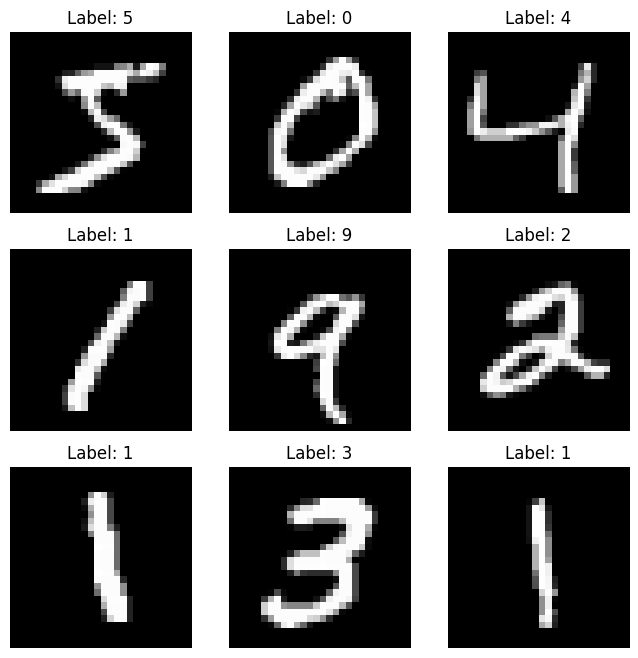

In [46]:
import matplotlib.pyplot as plt # Import the matplotlib.pyplot library for plotting
plt.figure(figsize=(8,8)) # Create a new figure with a specified size
for i in range(9): # Loop through the first 9 images in the training set
    plt.subplot(3,3,i+1) # Create a subplot in a 3x3 grid
    plt.imshow(x_train[i].reshape(28,28), cmap="gray") # Display the image in grayscale
    plt.title(f"Label: {y_train[i]}") # Set the title of the subplot to the image's label
    plt.axis("off") # Turn off the axes for the subplot
plt.show() # Display the plot

In [47]:
import tensorflow as tf # Import the tensorflow library
# Load the CIFAR-10 dataset, splitting it into training and testing sets
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
# Normalize the pixel values of the CIFAR-10 training data
x_train_c10 = x_train_c10 / 255.0
# Normalize the pixel values of the CIFAR-10 testing data
x_test_c10 = x_test_c10 / 255.0
# Print the shape of the CIFAR-10 training data
print(f"CIFAR-10 train shape: {x_train_c10.shape}")

CIFAR-10 train shape: (50000, 32, 32, 3)


In [48]:
from tensorflow.keras.models import Sequential # Import the Sequential model class
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # Import necessary layers

# Define a Sequential model for image classification
model = Sequential([
    # Add a 2D Convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and input shape
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    # Add a 2D MaxPooling layer with a 2x2 pool size
    MaxPooling2D((2,2)),
    # Add another 2D Convolutional layer with 64 filters, a 3x3 kernel, and ReLU activation
    Conv2D(64,(3,3),activation='relu'),
    # Add another 2D MaxPooling layer with a 2x2 pool size
    MaxPooling2D(2,2),
    # Flatten the output from the convolutional layers
    Flatten(),
    # Add a Dense layer with 128 units and ReLU activation
    Dense(128,activation='relu'),
    # Add the output Dense layer with 10 units (for 10 classes) and softmax activation
    Dense(10,activation='softmax')
])
# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
# Print a summary of the model's architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Train the model on the training data for 5 epochs with a batch size of 32 and a validation split of 20%
history = model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8980 - loss: 0.3317 - val_accuracy: 0.9825 - val_loss: 0.0564
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9868 - loss: 0.0445 - val_accuracy: 0.9879 - val_loss: 0.0404
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9911 - loss: 0.0263 - val_accuracy: 0.9902 - val_loss: 0.0334
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9942 - loss: 0.0178 - val_accuracy: 0.9886 - val_loss: 0.0404
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9955 - loss: 0.0145 - val_accuracy: 0.9898 - val_loss: 0.0380


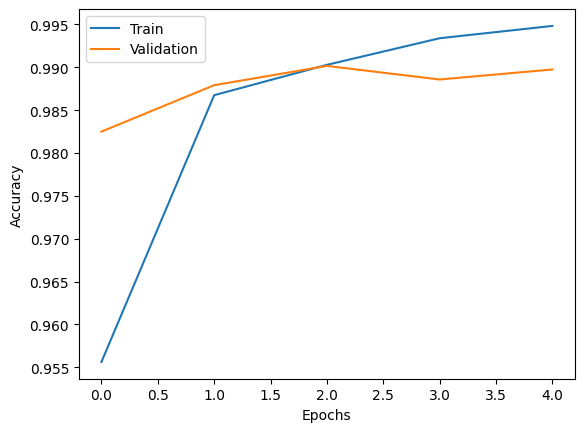

In [50]:
import matplotlib.pyplot as plt # Import the matplotlib.pyplot library for plotting
# Plot the training accuracy over epochs
plt.plot(history.history["accuracy"],label="Train")
# Plot the validation accuracy over epochs
plt.plot(history.history["val_accuracy"],
         label="Validation")
plt.xlabel("Epochs") # Set the label for the x-axis
plt.ylabel("Accuracy") # Set the label for the y-axis
plt.legend() # Display the legend
plt.show() # Show the plot

In [51]:
# Evaluate the model on the test data and get the loss and accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
# Print the test accuracy
print(f"Test accuracy: {test_acc:4f}")
# Make predictions on the test data and get the class with the highest probability
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9879 - loss: 0.0348
Test accuracy: 0.990800
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [52]:
from tensorflow.keras.layers import Dropout # Import the Dropout layer

# Define a Sequential model (this seems to be a duplicate of the MNIST model definition)
model = Sequential([
    # Add a 2D Convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and input shape
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    # Add a 2D MaxPooling layer with a 2x2 pool size
    MaxPooling2D((2,2)),
    # Add another 2D Convolutional layer with 64 filters, a 3x3 kernel, and ReLU activation
    Conv2D(64,(3,3),activation='relu'),
    # Add another 2D MaxPooling layer with a 2x2 pool size
    MaxPooling2D(2,2),
    # Flatten the output from the convolutional layers
    Flatten(),
    # Add a Dense layer with 128 units and ReLU activation
    Dense(128,activation='relu'),
    # Add the output Dense layer with 10 units (for 10 classes) and softmax activation
    Dense(10,activation='softmax')
])
# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator for data augmentation

# Create an ImageDataGenerator with specified augmentation parameters
datagen= ImageDataGenerator(
    rotation_range=10, # Rotate images by a random degree between -10 and 10
    width_shift_range=0.1, # Shift image horizontally by a random fraction of the width
    height_shift_range=0.1, # Shift image vertically by a random fraction of the height
    horizontal_flip=True, # Randomly flip images horizontally
)
# Fit the data generator to the CIFAR-10 training data
datagen.fit(x_train_c10)

In [54]:
from tensorflow.keras.layers import BatchNormalization # Import the BatchNormalization layer
from tensorflow.keras.models import Sequential # Import the Sequential model class
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Import necessary layers

# Define a Sequential model for CIFAR-10 classification
model = Sequential([
    # Add a 2D Convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and input shape
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    # Add a Batch Normalization layer
    BatchNormalization(),
    # Add a 2D MaxPooling layer with a 2x2 pool size
    MaxPooling2D((2,2)),
    # Add a 2D Convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
    Conv2D(64,(3,3),activation='relu'),
    # Add a 2D MaxPooling layer with a 2x2 pool size
    MaxPooling2D((2,2)),
    # Add a 2D Convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
    Conv2D(128,(3,3),activation='relu'),
    # Add a 2D MaxPooling layer with a 2x2 pool size
    MaxPooling2D((2,2)),
    # Flatten the output from the convolutional layers
    Flatten(),
    # Add a Dense layer with 128 units and ReLU activation
    Dense(128,activation='relu'),
    # Add a Dropout layer with a dropout rate of 0.5
    Dropout(0.5),
    # Add the output Dense layer with 10 units (for 10 classes) and softmax activation
    Dense(10,activation='softmax')
])
# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
# Train the model using the data generator for training data and the test data for validation
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.3192 - loss: 1.8288 - val_accuracy: 0.4830 - val_loss: 1.4356
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5199 - loss: 1.3504 - val_accuracy: 0.5056 - val_loss: 1.4615
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5792 - loss: 1.1933 - val_accuracy: 0.6408 - val_loss: 1.0307
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6125 - loss: 1.1168 - val_accuracy: 0.6641 - val_loss: 0.9687
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.6300 - loss: 1.0709 - val_accuracy: 0.6500 - val_loss: 0.9993
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6515 - loss: 1.0135 - val_accuracy: 0.6480 - val_loss: 1.0375
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6633 - loss: 0.9782 - val_accuracy: 0.5559 - val_loss: 1.3254
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.6668 - loss: 0.96

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1000
           1       0.80      0.80      0.80      1000
           2       0.81      0.33      0.47      1000
           3       0.62      0.31      0.41      1000
           4       0.63      0.70      0.66      1000
           5       0.76      0.43      0.55      1000
           6       0.62      0.82      0.70      1000
           7       0.70      0.75      0.72      1000
           8       0.86      0.72      0.79      1000
           9       0.45      0.96      0.61      1000

    accuracy                           0.66     10000
   macro avg       0.70      0.66      0.65     10000
weighted avg       0.70      0.66      0.65     10000



<function matplotlib.pyplot.show(close=None, block=None)>

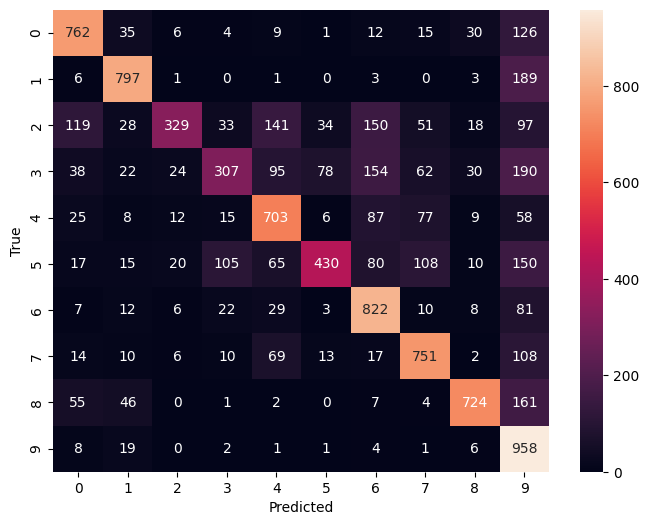

In [55]:
from sklearn.metrics import confusion_matrix, classification_report # Import confusion_matrix and classification_report
import numpy as np # Import the numpy library

# Make predictions on the CIFAR-10 test data and get the class with the highest probability
y_pred = model.predict(x_test_c10).argmax(axis=1)
# Compute the confusion matrix
cm = confusion_matrix(y_test_c10, y_pred)
# Print the classification report
print(classification_report(y_test_c10, y_pred))

import seaborn as sns # Import the seaborn library for enhanced visualizations
plt.figure(figsize=(8,6)) # Create a new figure with a specified size
sns.heatmap(cm,annot=True,fmt="d") # Create a heatmap of the confusion matrix with annotations
plt.xlabel("Predicted") # Set the label for the x-axis
plt.ylabel("True") # Set the label for the y-axis
plt.show # Display the plot (Note: this should be plt.show())

In [56]:
!kaggle datasets download -d tongpython/cat-and-dog # Download the cat-and-dog dataset from Kaggle

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [57]:
import zipfile # Import the zipfile module
with zipfile.ZipFile("/content/cat-and-dog.zip","r") as zip_ref: # Open the downloaded zip file
  zip_ref.extractall("/content/dogs-vs-cats") # Extract all contents of the zip file to a new directory

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator for data loading and augmentation

# Create an ImageDataGenerator with rescaling and a validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# Create a training data generator from the directory
train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats', # Path to the dataset directory
    target_size=(224,224), # Resize images to 224x224
    batch_size=32, # Set the batch size
    class_mode='binary', # Set the class mode to binary for binary classification
    subset='training' # Specify this is the training subset
)
# Create a validation data generator from the directory
val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats', # Path to the dataset directory
    target_size=(224,224), # Resize images to 224x224
    batch_size=32, # Set the batch size
    class_mode='binary', # Set the class mode to binary for binary classification
    subset='validation' # Specify this is the validation subset
)

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [59]:
from tensorflow.keras.applications import MobileNetV2 # Import the MobileNetV2 model
from tensorflow.keras.models import Sequential # Import the Sequential model class
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense # Import necessary layers

# Load the MobileNetV2 model with pre-trained ImageNet weights, excluding the top classification layer
base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
# Freeze the layers of the base model so they are not trained
base_model.trainable=False

# Define a Sequential model by adding custom layers on top of the base model
model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
# Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# Train the model using the generators for training and validation data
model.fit(train_generator,epochs=5,validation_data=val_generator)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 113ms/step - accuracy: 0.7833 - loss: 0.5424 - val_accuracy: 0.7985 - val_loss: 0.5103
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.7956 - loss: 0.5011 - val_accuracy: 0.7980 - val_loss: 0.5172
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8034 - loss: 0.4818 - val_accuracy: 0.7980 - val_loss: 0.5184
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.8004 - loss: 0.4701 - val_accuracy: 0.7920 - val_loss: 0.5296
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.8044 - loss: 0.4501 - val_accuracy: 0.7985 - val_loss: 0.5304


In [60]:
import tensorflow as tf # Import the tensorflow library
# Unfreeze the layers of the base model for fine-tuning
base_model.trainable = True
# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
# Continue training the model for 3 more epochs with fine-tuning
model.fit(train_generator, epochs=3, validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 94s 207ms/step - accuracy: 0.7968 - loss: 0.4981 - val_accuracy: 0.7975 - val_loss: 0.5326
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 117ms/step - accuracy: 0.8028 - loss: 0.4534 - val_accuracy: 0.7970 - val_loss: 0.5337
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 122ms/step - accuracy: 0.8036 - loss: 0.4273 - val_accuracy: 0.7970 - val_loss: 0.5380


In [61]:
import tensorflow as tf # Import the tensorflow library
# Save the trained model in the HDF5 format
model.save('mobilenet_cats_dogs.h5')
# To load the saved model
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step


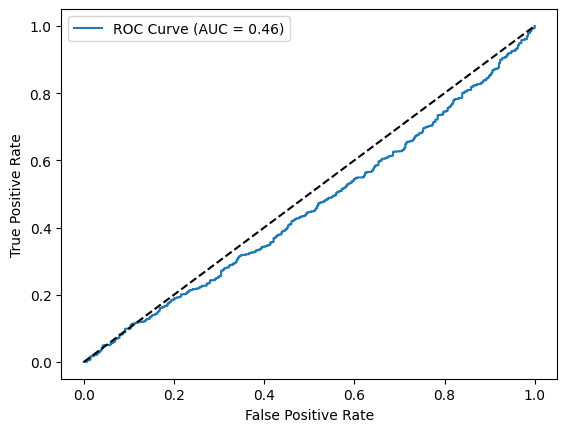

In [62]:
from sklearn.metrics import roc_curve, auc # Import roc_curve and auc for ROC analysis
import matplotlib.pyplot as plt # Import the matplotlib.pyplot library for plotting
import numpy as np # Import the numpy library

# Get the predicted probabilities for the validation data
y_pred_proba = loaded_model.predict(val_generator)
# Compute the False Positive Rate, True Positive Rate, and thresholds for the ROC curve
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
# Compute the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
# Plot the diagonal line representing random chance
plt.plot([0, 1], [0, 1], 'k--')
# Set the label for the x-axis
plt.xlabel('False Positive Rate')
# Set the label for the y-axis
plt.ylabel('True Positive Rate')
# Display the legend
plt.legend()
# Show the plot
plt.show()

In [63]:
from google.colab import files # Import the files module from google.colab
uploaded = files.upload()  # Upload an image file (e.g., 'mycat.jpg')

from tensorflow.keras.preprocessing import image # Import the image module from tensorflow.keras.preprocessing
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input # Import preprocess_input for MobileNetV2
import numpy as np # Import the numpy library

img_path = 'download.jpg'  # Specify the path to the uploaded image file
img = image.load_img(img_path, target_size=(224, 224)) # Load the image and resize it
img_array = image.img_to_array(img) # Convert the image to a NumPy array
img_array = np.expand_dims(img_array, axis=0) # Add a batch dimension to the array
img_array = preprocess_input(img_array) # Preprocess the image for MobileNetV2

prediction = loaded_model.predict(img_array) # Make a prediction using the loaded model
# Print the predicted class based on the prediction probability (0.5 threshold for binary classification)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving download.jpg to download (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: Dog


In [64]:
from google.colab import files # Import the files module from google.colab
uploaded = files.upload()  # Upload another image file (e.g., 'mycat.jpg')

from tensorflow.keras.preprocessing import image # Import the image module from tensorflow.keras.preprocessing
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input # Import preprocess_input for MobileNetV2
import numpy as np # Import the numpy library

img_path = 'download.jpg'  # Specify the path to the uploaded image file (Note: This might need to be updated if a different file was uploaded)
img = image.load_img(img_path, target_size=(224, 224)) # Load the image and resize it
img_array = image.img_to_array(img) # Convert the image to a NumPy array
img_array = np.expand_dims(img_array, axis=0) # Add a batch dimension to the array
img_array = preprocess_input(img_array) # Preprocess the image for MobileNetV2

prediction = loaded_model.predict(img_array) # Make a prediction using the loaded model
# Print the predicted class based on the prediction probability (0.5 threshold for binary classification)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving downloadimg.jpg to downloadimg (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class: Dog


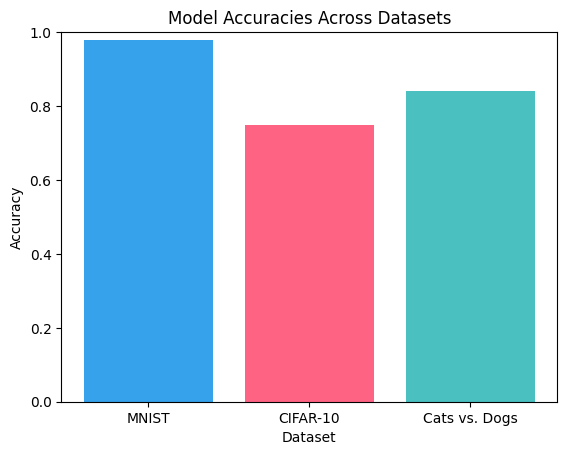

In [65]:
import matplotlib.pyplot as plt # Import the matplotlib.pyplot library for plotting
# Define the names of the datasets
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
# Define the corresponding accuracies for each dataset (Note: These values might need to be updated based on actual model performance)
accuracies = [0.98, 0.75, 0.84]
# Create a bar plot comparing accuracies across datasets with specified colors
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
# Set the title of the plot
plt.title('Model Accuracies Across Datasets')
# Set the label for the x-axis
plt.xlabel('Dataset')
# Set the label for the y-axis
plt.ylabel('Accuracy')
# Set the limits for the y-axis
plt.ylim(0,1)
# Show the plot
plt.show()